In [11]:
import os
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np


In [4]:
data_folder = r"C:\Users\ADMIN\Downloads\110m_cultural"
gdf = gpd.read_file(os.path.join(data_folder, "ne_110m_admin_0_countries.shp"))
gdf.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ..."
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,1,United Republic of Tanzania,...,None,None,None,None,None,None,None,None,None,"POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3..."
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,1,Western Sahara,...,Unrecognized,Unrecognized,Unrecognized,None,None,Unrecognized,None,None,None,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Admin-0 country,1,2,Canada,CAN,0,2,Sovereign country,1,Canada,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -122.97421 49.0025..."
4,Admin-0 country,1,2,United States of America,US1,1,2,Country,1,United States of America,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -120 49, -117.0312..."


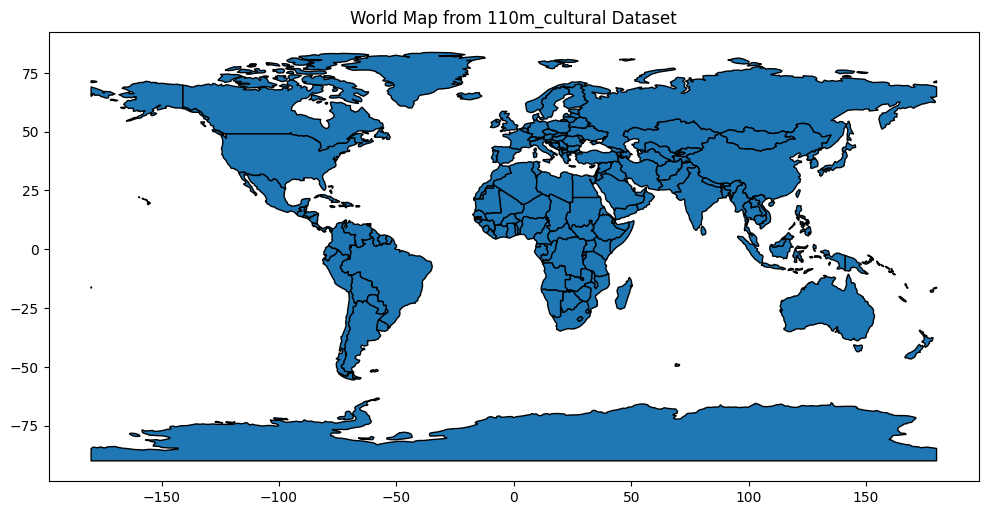

In [15]:
gdf.plot(figsize=(12, 6), edgecolor="black")
plt.title("World Map from 110m_cultural Dataset")
plt.show()

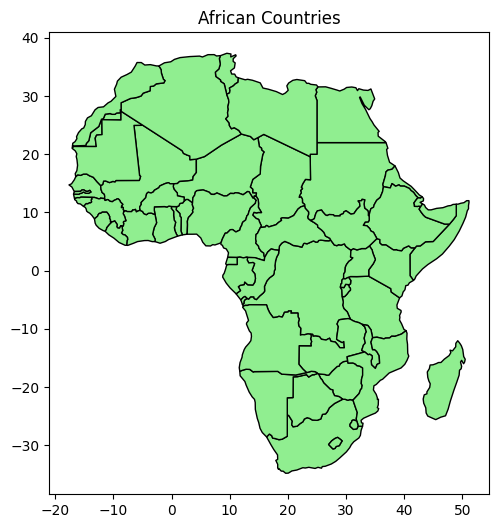

In [6]:
# Extract centroid of each country
africa = gdf[gdf["CONTINENT"] == 'Africa']
africa.plot(figsize=(10, 6), color="lightgreen", edgecolor="black")
plt.title("African Countries")
plt.show()

In [44]:
# Select African countries with a population greater than 100 million
kenya = gdf[gdf['NAME'] == 'Kenya']
n = gdf[gdf.intersects(kenya.unary_union)]
n[['NAME', 'POP_EST']]


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9744\1885762621.py:3: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  n = gdf[gdf.intersects(kenya.unary_union)]


,NAME,POP_EST
1,Tanzania,58005463.0
12,Somalia,10192317.3
13,Kenya,52573973.0
165,Ethiopia,112078730.0
168,Uganda,44269594.0
176,S. Sudan,11062113.0


In [58]:
gdf.iloc[2,1]

np.int32(1)

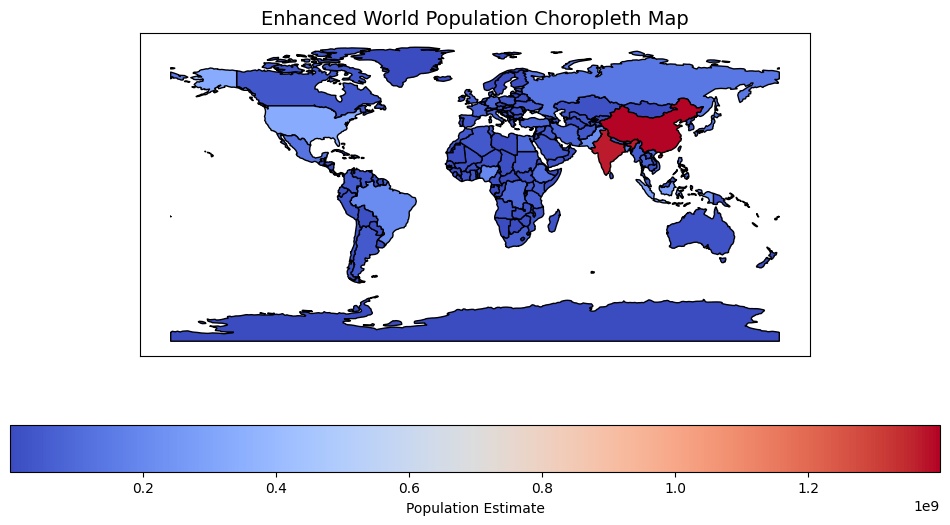

In [10]:
fig, ax = plt.subplots(figsize=(12, 6))

# Plot with a colorbar legend
gdf.plot(column='POP_EST', cmap='coolwarm', edgecolor='black',
           legend=True, legend_kwds={'label': "Population Estimate",
                                     'orientation': "horizontal"},
           ax=ax)

# Remove axis labels
ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(True)

ax.set_title("Enhanced World Population Choropleth Map", fontsize=14)
plt.show()




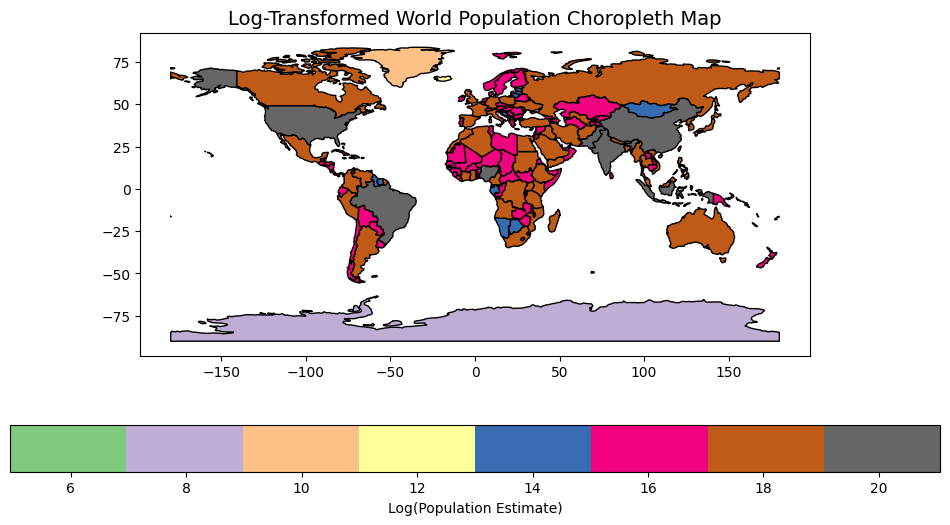

In [16]:


# Avoid log(0) issues by replacing zero values with NaN
gdf['log_pop'] = np.log1p(gdf['POP_EST'])

# Plot log-transformed population map
fig, ax = plt.subplots(figsize=(12, 6))
gdf.plot(column='log_pop', cmap='Accent', edgecolor='black',
           legend=True, legend_kwds={'label': "Log(Population Estimate)",
                                     'orientation': "horizontal"},
           ax=ax)

ax.set_title("Log-Transformed World Population Choropleth Map", fontsize=14)
plt.show()


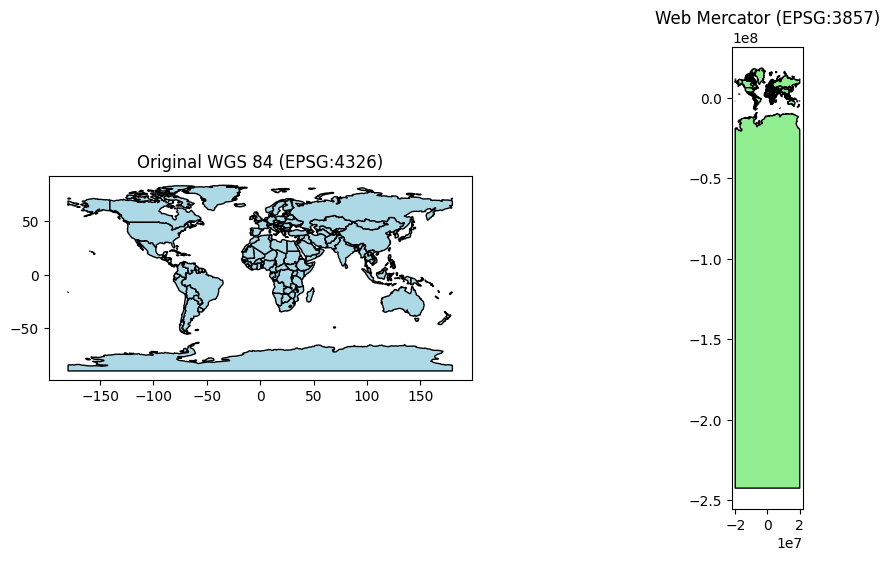

In [19]:
xy = gdf.to_crs(epsg = 3857)

# Plot original WGS 84
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

gdf.plot(ax=ax[0], color='lightblue', edgecolor='black')
ax[0].set_title("Original WGS 84 (EPSG:4326)")

# Reproject to Mercator and plot
xy.plot(ax=ax[1], color='lightgreen', edgecolor='black')
ax[1].set_title("Web Mercator (EPSG:3857)")

plt.show()
